In [201]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

In [202]:
warnings.filterwarnings('ignore')

In [203]:
# Load the data
transactions = pd.read_csv('transactions.csv')
transactions.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.0,0.0,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.0,0.0,C1323169990,2720411.37,3178359.67,0


In [204]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            199999 non-null  int64  
 1   type            199999 non-null  object 
 2   amount          199999 non-null  float64
 3   nameOrig        199999 non-null  object 
 4   oldbalanceOrg   199999 non-null  float64
 5   newbalanceOrig  199999 non-null  float64
 6   nameDest        199999 non-null  object 
 7   oldbalanceDest  199999 non-null  float64
 8   newbalanceDest  199999 non-null  float64
 9   isFraud         199999 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 15.3+ MB


In [205]:
# How many fraudulent transactions?
frad_trans = np.sum(transactions.isFraud == 1)
print(f'The number of fraudulent transactions is {frad_trans}')
# Summary statistics on amount column
aggreg = transactions.amount.describe()
print(f'The aggregate statistics of amount is:\n{aggreg}')

The number of fraudulent transactions is 282
The aggregate statistics of amount is:
count    1.999990e+05
mean     1.802425e+05
std      6.255482e+05
min      0.000000e+00
25%      1.338746e+04
50%      7.426695e+04
75%      2.086376e+05
max      5.204280e+07
Name: amount, dtype: float64


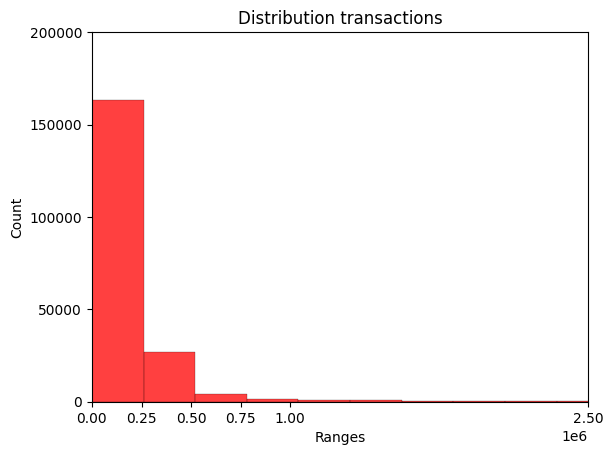

<Figure size 640x480 with 0 Axes>

In [206]:
sns.histplot(transactions.amount, color='red', bins=200)
plt.title('Distribution transactions')
plt.xlabel('Ranges')
plt.ylabel('Count')
plt.yticks([0, 50000, 100000, 150000, 200000])
plt.xlim([0, 2500000])
plt.xticks([0, 250000, 500000, 750000, 1000000, 2500000])
plt.show()
plt.clf()

In [207]:
# Create isPayment field
transactions['isPayment'] = 0
transactions['isPayment'][(transactions.type == 'PAYMENT') | (transactions.type == 'DEBIT')] = 1
print(transactions[['type', 'isPayment']])

            type  isPayment
0       CASH_OUT          0
1       CASH_OUT          0
2        CASH_IN          0
3       CASH_OUT          0
4       CASH_OUT          0
...          ...        ...
199994   PAYMENT          1
199995  CASH_OUT          0
199996   CASH_IN          0
199997   CASH_IN          0
199998  CASH_OUT          0

[199999 rows x 2 columns]


In [208]:
# Create isMovement field
transactions['isMovement'] = 0
transactions.isMovement[(transactions.type == 'CASH_OUT') | (transactions.type == 'TRANSFER')] = 1
print(transactions[['type', 'isMovement']])

            type  isMovement
0       CASH_OUT           1
1       CASH_OUT           1
2        CASH_IN           0
3       CASH_OUT           1
4       CASH_OUT           1
...          ...         ...
199994   PAYMENT           0
199995  CASH_OUT           1
199996   CASH_IN           0
199997   CASH_IN           0
199998  CASH_OUT           1

[199999 rows x 2 columns]


In [209]:
# Create accountDiff field
transactions['accountDiff'] = np.abs(transactions.oldbalanceOrg - transactions.oldbalanceDest)
print(transactions.head())

   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     8  CASH_OUT  158007.12   C424875646           0.00            0.00   
1   236  CASH_OUT  457948.30  C1342616552           0.00            0.00   
2    37   CASH_IN  153602.99   C900876541    11160428.67     11314031.67   
3   331  CASH_OUT   49555.14   C177696810       10865.00            0.00   
4   250  CASH_OUT   29648.02   C788941490           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isPayment  \
0  C1298177219       474016.32      1618631.97        0          0   
1  C1323169990      2720411.37      3178359.67        0          0   
2   C608741097      3274930.56      3121327.56        0          0   
3   C462716348            0.00        49555.14        0          0   
4  C1971700992        56933.09        86581.10        0          0   

   isMovement  accountDiff  
0           1    474016.32  
1           1   2720411.37  
2           0   7885498.11  
3     

In [210]:
# Create features and label variables
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
labels = transactions['isFraud']
X = features
y = labels

In [211]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [212]:
# Normalize the features variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
# Fit the model to the training data
lrm = LogisticRegression()
model = lrm.fit(X_train, y_train)

In [214]:
# Score the model on the training data
print(model.score(X_train, y_train))

# Score the model on the test data
print(model.score(X_test, y_test))

# Print the model coefficients
print(model.coef_)

0.998514275101965
0.9987
[[ 0.22592823 -0.73562634  2.28381832 -0.62093738]]


In [215]:
# New transaction data
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])

# Create a new transaction
transaction4 = np.array([70000.31, 1.0, 0.0, 60000.5])

In [216]:
# Combine new transactions into a single array
sample_transactions = np.stack((transaction1, transaction2, transaction3, transaction4))
sample_transactions

array([[1.2345678e+05, 0.0000000e+00, 1.0000000e+00, 5.4670100e+04],
       [9.8765430e+04, 1.0000000e+00, 0.0000000e+00, 8.5247500e+03],
       [5.4367831e+05, 1.0000000e+00, 0.0000000e+00, 5.1002550e+05],
       [7.0000310e+04, 1.0000000e+00, 0.0000000e+00, 6.0000500e+04]])

In [217]:
list_trans = [[123456.78, 0.0, 1.0, 54670.1],
              [98765.43, 1.0, 0.0, 8524.75],
              [543678.31, 1.0, 0.0, 510025.5]
              ]
#list_trans

In [218]:
# Normalize the new transactions
sample_transactions = scaler.transform(sample_transactions)
# Predict fraud on the new transactions
pred_samples = model.predict(sample_transactions)
print(pred_samples)

[0 0 0 0]


In [219]:
# Show probabilities on the new transactions
pred_samples_prob = model.predict_proba(sample_transactions)
print(pred_samples_prob)

[[9.96446977e-01 3.55302293e-03]
 [9.99992442e-01 7.55789856e-06]
 [9.99991788e-01 8.21245766e-06]
 [9.99992581e-01 7.41896487e-06]]
